In [2]:
from PIL import Image
from skimage.color import rgb2lab, lab2rgb
from sklearn.cluster import KMeans
from worldgen.image import load_image, patch#, extract_biomes
from worldgen.visualization import colormap_biomes, visualize_biomes
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import scipy.ndimage as ndi

goal = 65536
base = 4096
scale = base * 128
patches = 8
patch_window = int(base / patches)
biome_count = 10

world_image = load_image("./assets/world_4096_map.png", base)
width, height = world_image.shape[0:2]
original_image = world_image[:,:,:3].reshape(-1, 3)
lab_image = rgb2lab(original_image)
print(original_image.shape, lab_image.shape)


OCEAN = (0, 0, 255)
PLAINS = (50, 255, 0)
GRASSLAND = (40, 240, 0)
HILLS = (25, 230, 0)
WOODLAND = (5, 200, 36)
FOREST = (0, 160, 0)
SWAMP = (164, 234, 123)
DESERT = (232, 253, 5)
HILLS = (247, 247, 247)
UPLAND = (220, 220, 220)
MOUNTAINS = (228, 228, 228)
ALPINE_L = (180, 180, 180)
ALPINE = (176, 176, 176)
SCRUBLAND = (252, 252, 210.0)
colorn = ['ocean', 'plains', 'grassland', 'hills', 'woodland', 'forest', 'swamp', 'scrubland', 'desert', 'hills', 'upland', 'mountains', 'alpine_l', 'alpine']
colors = [OCEAN, PLAINS, GRASSLAND, HILLS, WOODLAND, FOREST, SWAMP, SCRUBLAND, DESERT, HILLS, UPLAND, MOUNTAINS, ALPINE_L, ALPINE]

colors = np.array(colors, dtype=np.uint8)
lab_colors = rgb2lab(colors.reshape(-1, 3)).reshape(-1, 3)
color_distance = np.zeros((width, height, len(colors)), dtype=np.uint16)
lab_distance = np.zeros((width, height, len(colors)), dtype=np.uint16)


(16777216, 3) (16777216, 3)


In [58]:
(np.sum((original_image - color) ** 2, axis=1)).reshape(width, height).shape

ValueError: cannot reshape array of size 16777216 into shape (16777216,3)

(4, 4) 0 0
(4, 4) 1 0
(4, 4) 2 0
(4, 4) 3 0
(4, 4) 0 1
(4, 4) 1 1
(4, 4) 2 1
(4, 4) 3 1
(4, 4) 0 2
(4, 4) 1 2
(4, 4) 2 2
(4, 4) 3 2
(4, 4) 0 3
(4, 4) 1 3


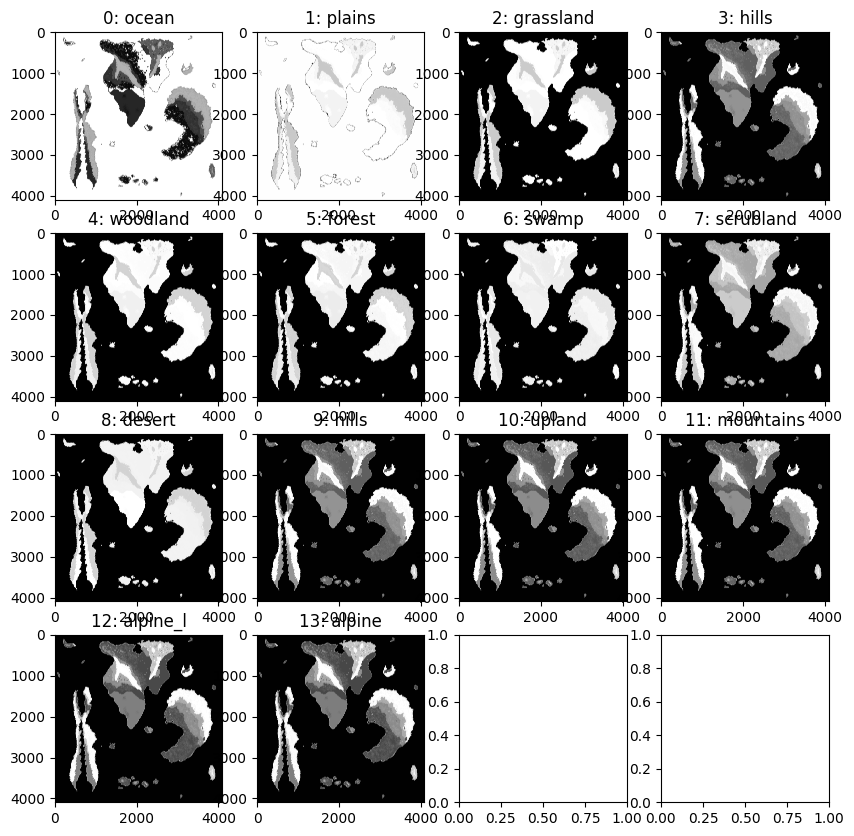

In [60]:
lf = math.ceil(len(colors) / 4)
fig, ax = plt.subplots(lf, 4, figsize=(10, 10))
for i, color in enumerate(colors):
    v, u = i // 4, i % 4
    print(ax.shape, u, v)
    #color_distance[:, :, i] = np.sqrt(np.sum((original_image - color) ** 2, axis=2))
    color_distance[:, :, i] = np.sum((original_image - color) ** 2, axis=1).reshape(width, height)
    lab_distance[:, :, i] = np.sum((lab_image - lab_colors[i]) ** 2, axis=1).reshape(width, height)
    ax[v, u].imshow(lab_distance[:, :, i] * -1, cmap='gray')
    ax[v, u].set_title(f'{i}: {colorn[i]}')

plt.show()



In [61]:

from matplotlib.colors import ListedColormap
dv = lab_distance.reshape(-1, len(colors))
minv = dv.min(axis=1)

zone_map = np.zeros((width * height, 2), dtype=np.uint8)
zone_map[:, 0] = np.argmin(color_distance.reshape(-1, len(colors)), axis=1)

zone_map[:, 1] = np.argmin(lab_distance.reshape(-1, len(colors)), axis=1)
zdf = pd.DataFrame(zone_map, columns=['color', 'lab'])
zdf[zdf['color'] != zdf['lab']].groupby(['color', 'lab']).size().reset_index().rename(columns={0: 'count'}).sort_values('count', ascending=False)

,color,lab,count
74,6,2,145273
13,1,2,74934
98,8,2,63658
29,2,6,42723
52,4,5,31431
134,12,2,29936
38,3,2,26921
19,1,8,19426
48,4,0,19418
146,13,2,19197


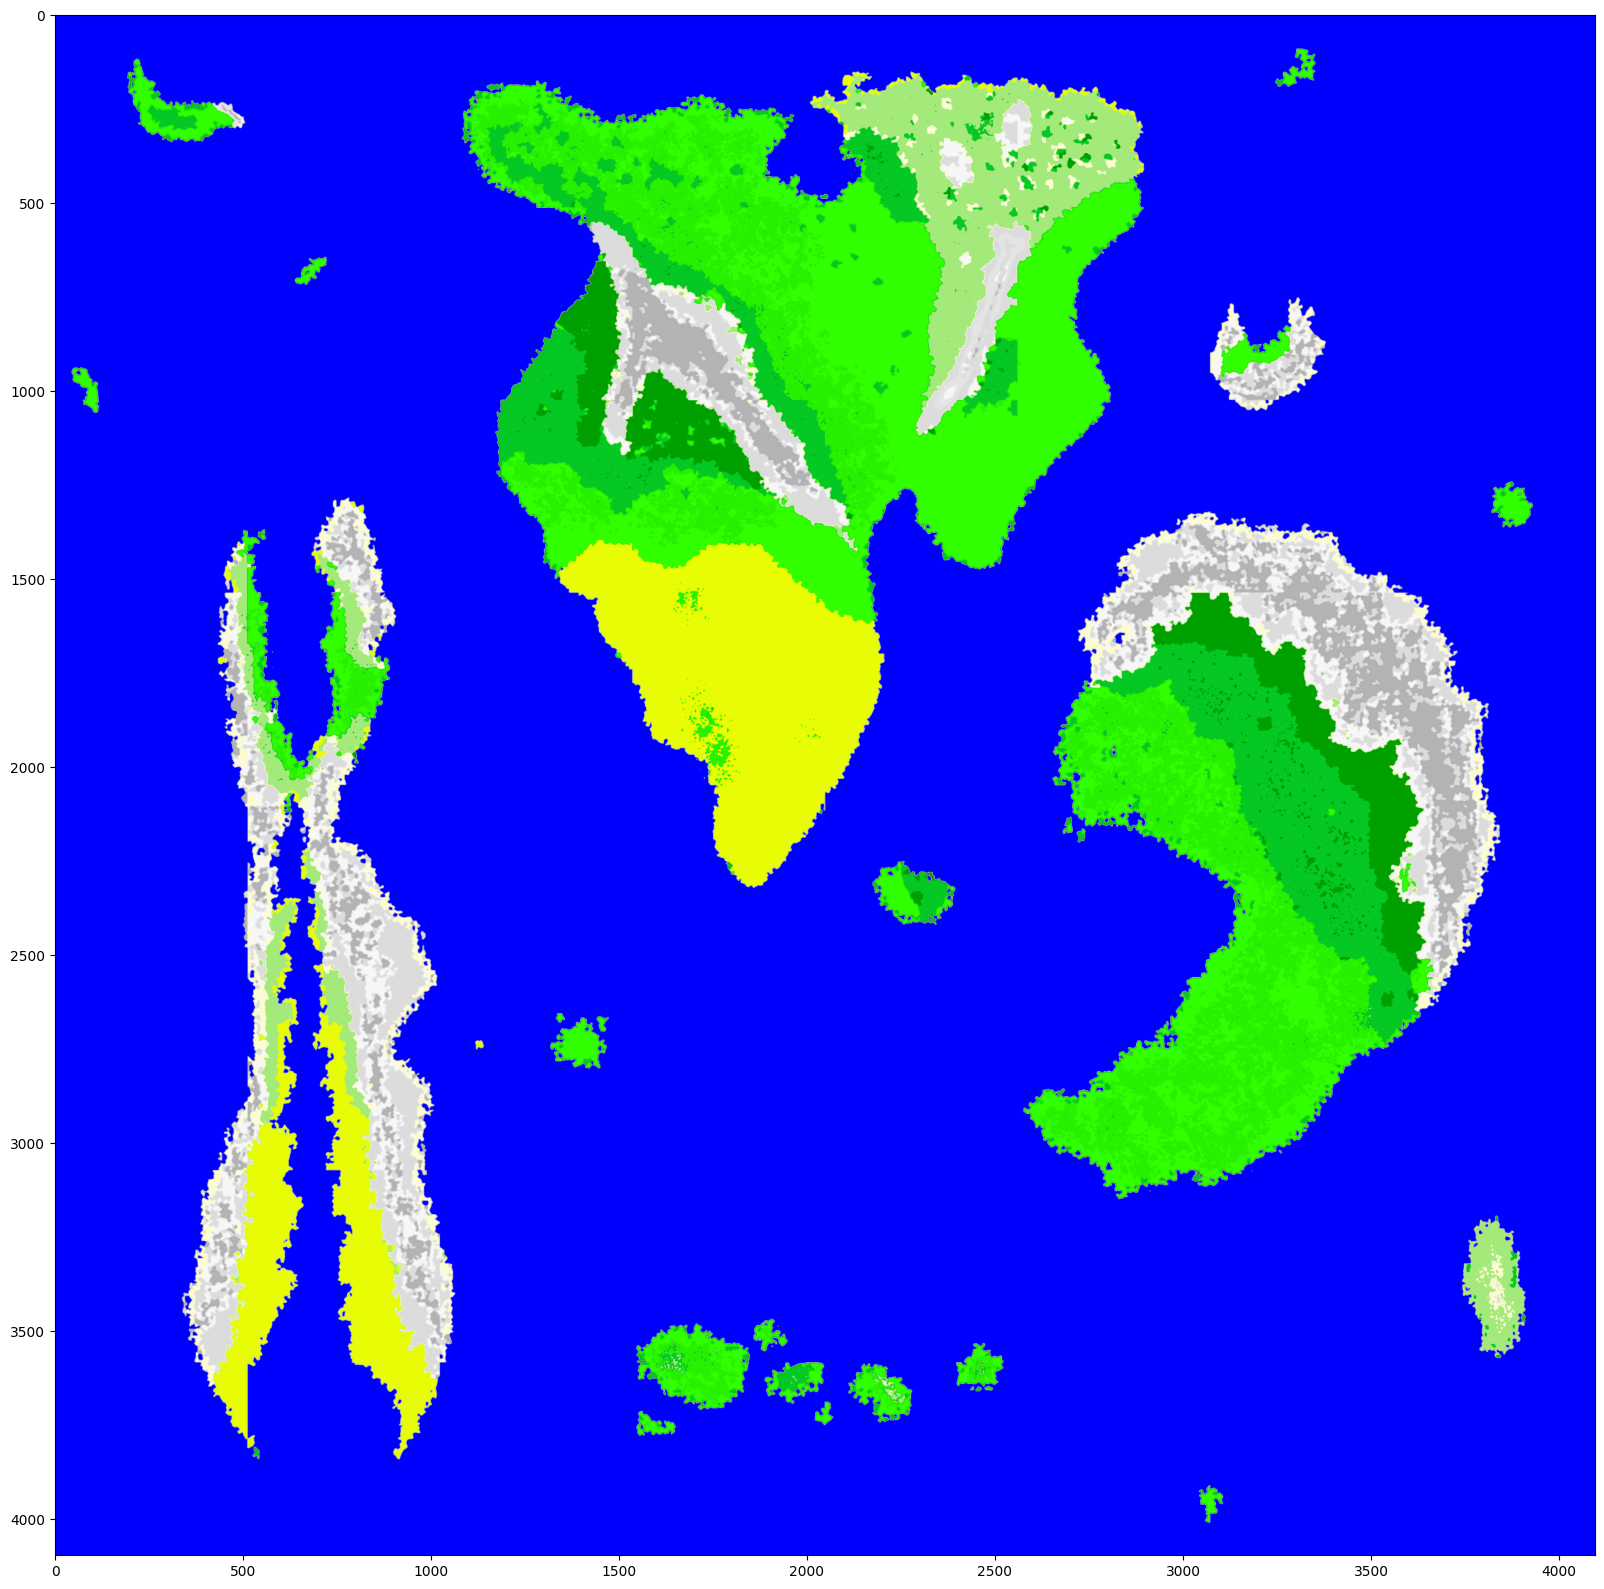

In [69]:
zd = pd.merge(pd.DataFrame(zone_map[:,1]).reset_index(), pd.DataFrame(colors, columns=['R', 'G', 'B']), left_on=0, right_index=True).sort_index()[['R', 'G', 'B']].values
#cmap = ListedColormap(colors / 255., 'Zones')
delta = np.sum((original_image.astype(np.float32) - zd) ** 2, axis=1)
fig, ax = plt.subplots(1, 1, figsize=(20, 20))
#ax[0].imshow(delta.reshape(width, height), cmap='terrain')
#ax[1].imshow(original_image.reshape(width, height, 3))
ax.imshow(zd.reshape(width, height, 3) / 255.)

#plt.figure(figsize=(16, 16))
#plt.imshow(zone_map.reshape(width, height), cmap=cmap)
#plt.colorbar()

In [71]:
from matplotlib.colors import ListedColormap
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', None)

df = pd.DataFrame(np.stack([zone_map[:, 0],
                            zone_map[:, 1],
                            original_image[:, 0],
                            original_image[:, 1],
                            original_image[:, 2],
                            zd[:, 0],
                            zd[:, 1],
                            zd[:, 2],
                            delta], axis=1), columns=['zonec', 'zonel', 'oR', 'oG', 'oB', 'zR', 'zG', 'zB','delta'])

#df[df['delta'] > 5000].sort_values('delta').groupby(['oR', 'oG', 'oB', 'zR', 'zG', 'zB']).count()['delta'].sort_values(ascending=False)
df[df['delta'] > 50000][df['oB'] < 200].sort_values('delta', ascending=False)

C:\Users\user\AppData\Local\Temp\ipykernel_26832\665745856.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['delta'] > 50000][df['oB'] < 200].sort_values('delta', ascending=False)


,zonec,zonel,oR,oG,oB,zR,zG,zB,delta
5736167,1.0,0.0,67.0,255.0,1.0,0.0,0.0,255.0,134030.0
15328808,1.0,0.0,59.0,254.0,3.0,0.0,0.0,255.0,131501.0
3782933,1.0,0.0,57.0,254.0,5.0,0.0,0.0,255.0,130265.0
14776477,1.0,0.0,57.0,254.0,5.0,0.0,0.0,255.0,130265.0
7844570,1.0,0.0,57.0,254.0,5.0,0.0,0.0,255.0,130265.0
3967249,1.0,0.0,57.0,254.0,5.0,0.0,0.0,255.0,130265.0
4098310,1.0,0.0,57.0,254.0,5.0,0.0,0.0,255.0,130265.0
4262143,1.0,0.0,57.0,254.0,5.0,0.0,0.0,255.0,130265.0
4299005,1.0,0.0,57.0,254.0,5.0,0.0,0.0,255.0,130265.0
14657960,1.0,0.0,57.0,254.0,5.0,0.0,0.0,255.0,130265.0
